In [1]:
import pandas as pd
import test_model_functions
bend_df = pd.read_csv("bend.csv")

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(('Gaussian N-Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC(gamma='auto')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=15)))
models.append(('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=20)))
models.append(('Decision Tree', DecisionTreeClassifier()))

Gaussian N-Bayes
After 10 fold cross validation:
>>>Accuracy: 0.75 (+/- 0.12)
>>>Misclassification Rate: 0.25 (+/- 0.12)
>>>F1_score: 0.18 (+/- 0.08)
>>>Precision: 0.19 (+/- 0.08)
>>>Recall: 0.17 (+/- 0.11)
>>>Confusion Matrix:
[[22  5  0]
 [19 14  0]
 [ 0  0 30]]
>>>Sensitiviy: 
   Sensitivity of F = 0.5365853658536586
   Sensitivity of M = 0.7368421052631579
   Sensitivity of N = 1.0


Support Vector Machine
After 10 fold cross validation:
>>>Accuracy: 0.77 (+/- 0.10)
>>>Misclassification Rate: 0.23 (+/- 0.10)
>>>F1_score: 0.21 (+/- 0.09)
>>>Precision: 0.18 (+/- 0.11)
>>>Recall: 0.23 (+/- 0.10)
>>>Confusion Matrix:
[[24  5  0]
 [10 19  0]
 [ 0  0 32]]
>>>Sensitiviy: 
   Sensitivity of F = 0.7058823529411765
   Sensitivity of M = 0.7916666666666666
   Sensitivity of N = 1.0


Random Forest
After 10 fold cross validation:
>>>Accuracy: 0.80 (+/- 0.14)
>>>Misclassification Rate: 0.20 (+/- 0.14)
>>>F1_score: 0.18 (+/- 0.15)
>>>Precision: 0.15 (+/- 0.13)
>>>Recall: 0.17 (+/- 0.11)
>>>Confu

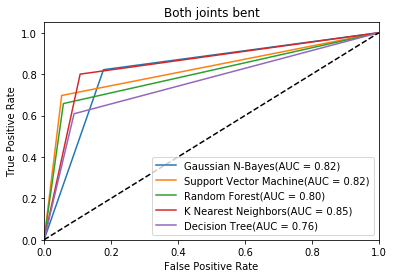

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

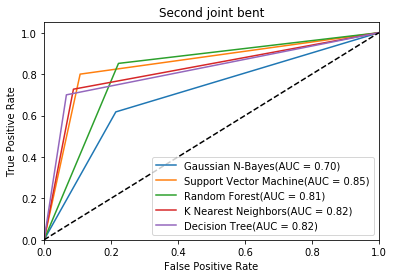

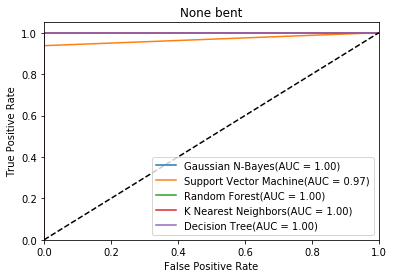

In [9]:
model_roc = {}
for name, model in models:
    print(name)
    test_model_functions.test_model(bend_df, model)
    model_roc[name] = test_model_functions.plot_multiple_ROC(model, bend_df)

import matplotlib.pyplot as plt 
for i in range(3):
    plt.figure(i+1)
    for name in model_roc.keys():
        [fpr, tpr, roc_auc] = model_roc[name]
        plt.plot(fpr[i], tpr[i], label= name + '(AUC = %0.2f)' % roc_auc[i])
        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    if i == 0:    
        plt.title('Both joints bent')
    elif i == 1:
        plt.title('Second joint bent')
    else:
        plt.title('None bent')
    plt.legend(loc="lower right")
    plt.show()